In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import tensorflow as tf


In [6]:
df_raw = pd.read_excel("/workspaces/clases-4geeks/datasets/Concrete_Data.xls")
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [7]:
df_baking = df_raw.copy()
columns = [
    "cement", "blast_furnace_slag", "fly_ash", "water", "superplasticizer",
    "coarse_aggregate", "fine_aggregate", "age","concrete_compressive_strength"
    ]
df_baking.columns = columns
df = df_baking.copy()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [8]:
df_train, df_test = train_test_split(df,test_size=0.2,random_state=2025)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.shape , df_test.shape

((824, 9), (206, 9))

In [9]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,824.0,278.074320,105.202346,102.000000,190.255000,255.000000,350.000000,540.000000
blast_furnace_slag,824.0,76.231311,86.630413,0.000000,0.000000,26.000000,145.000000,359.400000
fly_ash,824.0,53.503083,64.244911,0.000000,0.000000,0.000000,118.270000,200.100000
water,824.0,181.901396,21.936752,121.750000,164.900000,185.700000,193.000000,247.000000
superplasticizer,824.0,6.186624,6.094910,0.000000,0.000000,6.325000,10.300000,32.200000
coarse_aggregate,824.0,971.264211,77.333406,801.000000,932.000000,968.000000,1028.400000,1134.300000
fine_aggregate,824.0,773.822100,80.960805,594.000000,729.750000,779.510000,825.125000,992.600000
age,824.0,46.007282,63.292854,1.000000,12.250000,28.000000,56.000000,365.000000
concrete_compressive_strength,824.0,35.512051,16.683885,2.331808,23.728144,33.729166,45.367521,82.599225


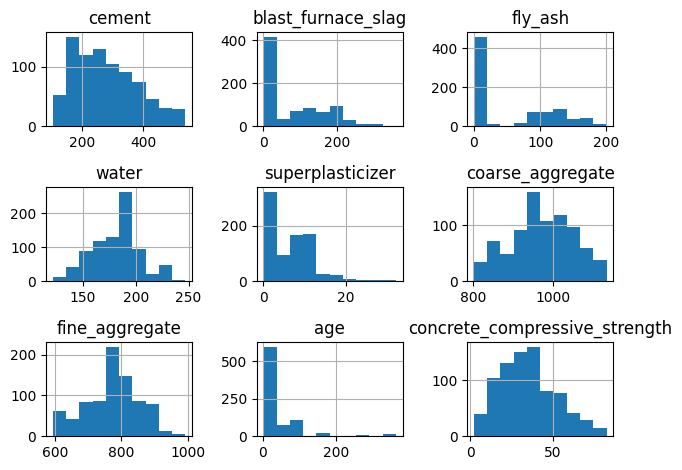

In [10]:
df_train.hist()
plt.tight_layout()
plt.show()

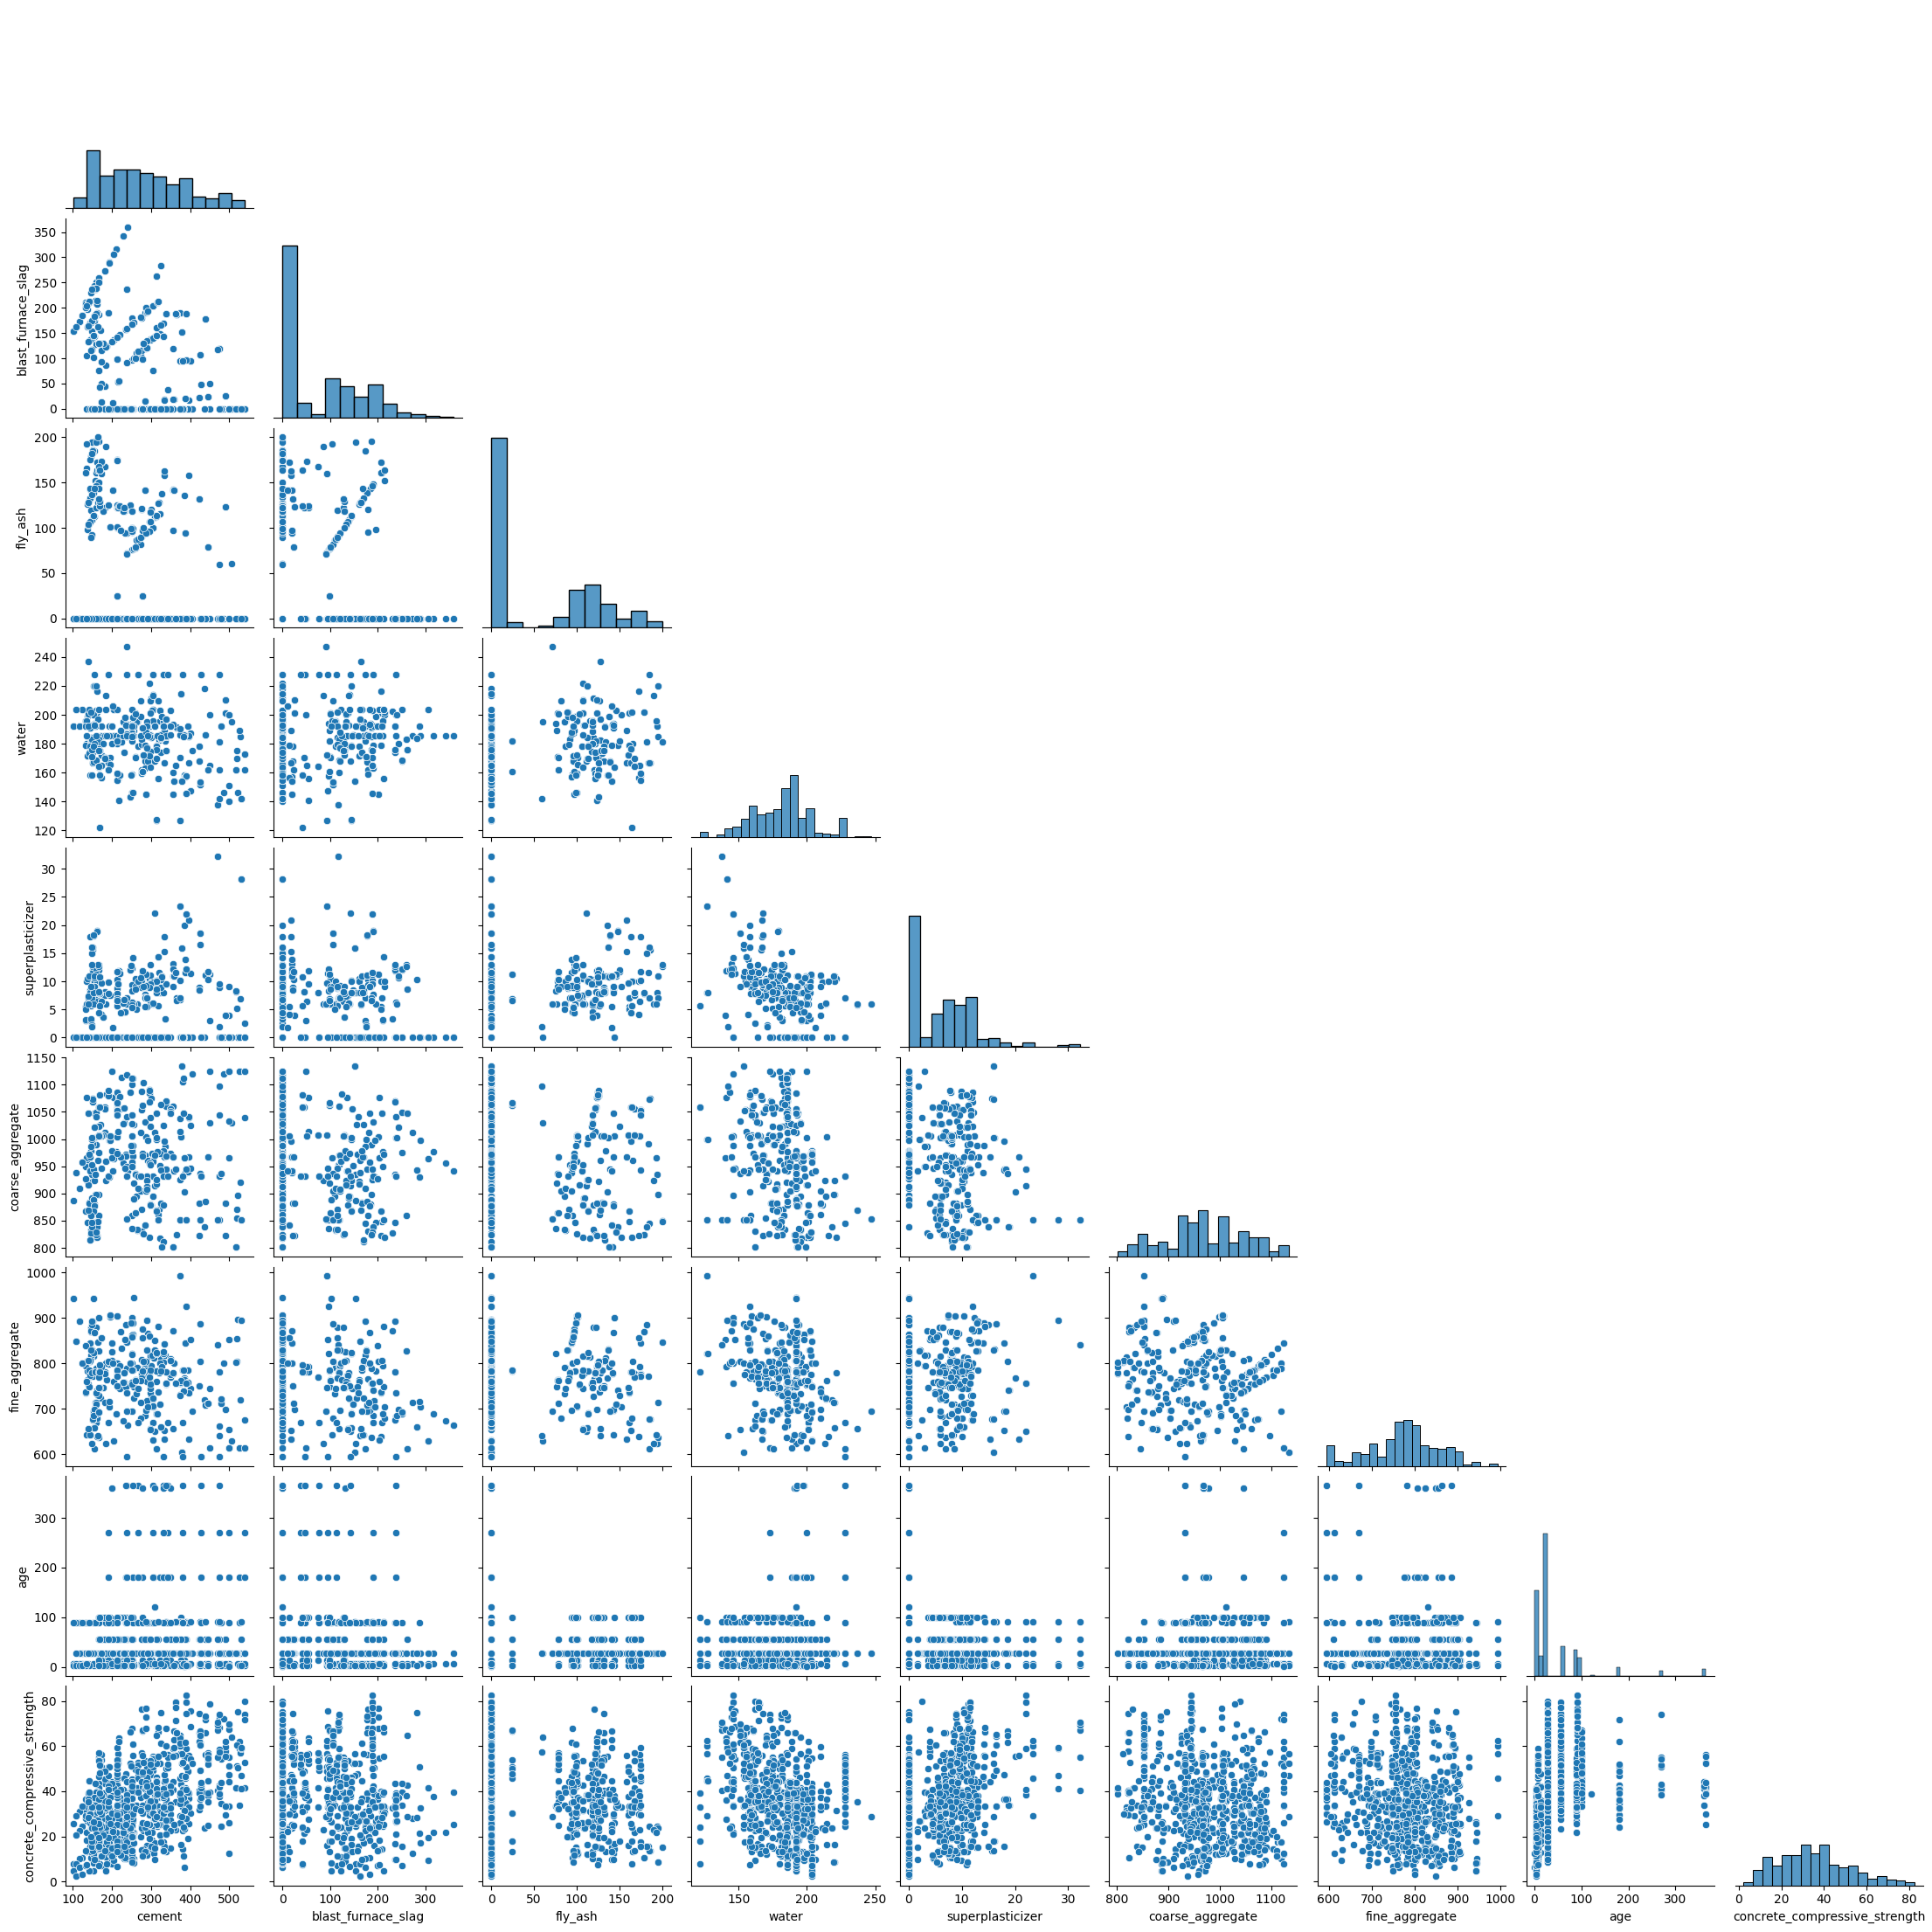

In [11]:
sns.pairplot(df_train,corner=True)
plt.show()

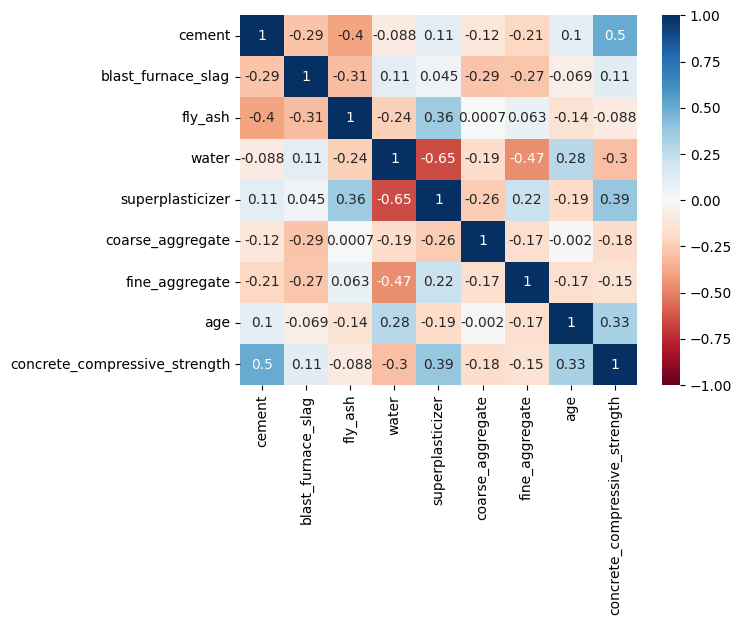

In [12]:
sns.heatmap(df_train.corr(), vmin=-1,vmax=1,cmap="RdBu",annot=True)
plt.show()

In [13]:
#Deep Learning

X_train = df_train.drop(columns=["concrete_compressive_strength"])
y_train = df_train["concrete_compressive_strength"]

X_test = df_test.drop(columns=["concrete_compressive_strength"])
y_test = df_test["concrete_compressive_strength"]

In [14]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
type(X_train_sc), type(y_train)

(numpy.ndarray, pandas.core.series.Series)

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation="relu",input_shape=(8,)),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(16,activation="relu"),
    tf.keras.layers.Dense(8,activation="relu"),
    tf.keras.layers.Dense(1)
])


/workspaces/clases-4geeks/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-17 04:12:48.618394: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True,show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [18]:
model.compile(optimizer="adam",loss="mse",metrics=["mse"])

In [19]:
history = model.fit(X_train_sc,y_train.values,epochs=200,batch_size=100,validation_split=0.2)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1585.9092 - mse: 1585.9092 - val_loss: 1384.5509 - val_mse: 1384.5509
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1578.1188 - mse: 1578.1188 - val_loss: 1380.0521 - val_mse: 1380.0521
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1574.0164 - mse: 1574.0164 - val_loss: 1376.3745 - val_mse: 1376.3745
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1569.7452 - mse: 1569.7452 - val_loss: 1371.8063 - val_mse: 1371.8063
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1564.1543 - mse: 1564.1543 - val_loss: 1365.7979 - val_mse: 1365.7979
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1556.4796 - mse: 1556.4796 - val_loss: 1357.5458 - val_mse: 1357.5458
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1546.1860 - mse: 1546.1860 - val_loss: 1346.1494 - val_mse: 1346.1494
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1531.7494 - mse: 1531.7494 - val_loss: 1330.2786 - 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 160.6634 - mse: 160.6634 - val_loss: 176.2856 - val_mse: 176.2856
Epoch 39/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 158.6017 - mse: 158.6017 - val_loss: 174.5767 - val_mse: 174.5767
Epoch 40/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 156.9320 - mse: 156.9320 - val_loss: 173.3432 - val_mse: 173.3432
Epoch 41/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 155.1802 - mse: 155.1802 - val_loss: 172.2806 - val_mse: 172.2806
Epoch 42/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 153.5782 - mse: 153.5782 - val_loss: 171.5478 - val_mse: 171.5478
Epoch 43/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 152.0698 - mse: 152.0698 - val_loss: 170.4869 - val_mse: 170.4869
Epoch 44/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 150.5252 - mse: 150.5252 - val_loss: 170.0668 - val_mse: 170.0668
Epoch 45/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 149.0964 - mse: 149.0964 - val_loss: 169.0014 - val_mse: 169.0014
Epoch 46/200


In [20]:
loss=history.history["loss"]
val_loss = history.history["val_loss"]
mse = history.history["mse"]
val_mse = history.history["val_mse"]

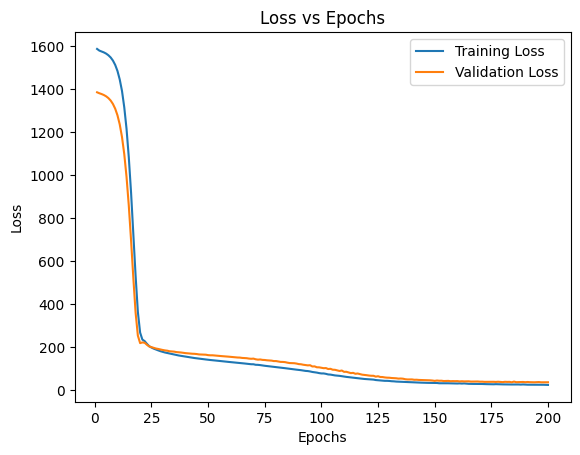

In [21]:
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,label="Training Loss")
plt.plot(epochs,val_loss,label="Validation Loss")
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

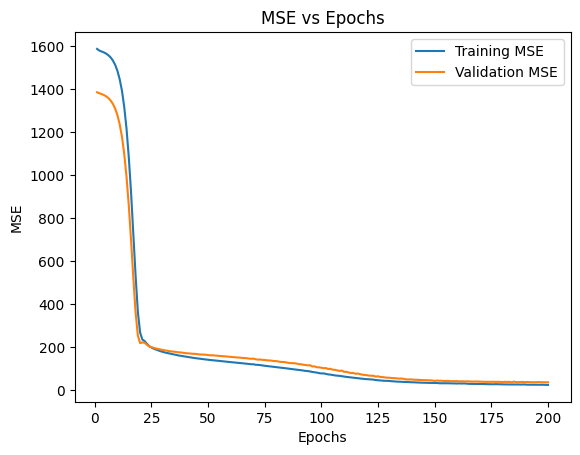

In [22]:
plt.plot(epochs,mse,label="Training MSE")
plt.plot(epochs,val_mse,label="Validation MSE")
plt.title("MSE vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()

In [23]:
loss,mse = model.evaluate(X_test_sc,y_test.values)
print(f"Test MSE: {mse:.1f}, RMSE: {np.sqrt(mse):.1f} ")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37.3367 - mse: 37.3367 
Test MSE: 37.3, RMSE: 6.1 


In [24]:
url = 'https://raw.githubusercontent.com/selva86/' + \
'datasets/master/orange_juice_withmissing.csv'
df_raw = pd.read_csv(url)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Purchase        1070 non-null   object 
 1   WeekofPurchase  1070 non-null   int64  
 2   StoreID         1069 non-null   float64
 3   PriceCH         1069 non-null   float64
 4   PriceMM         1066 non-null   float64
 5   DiscCH          1068 non-null   float64
 6   DiscMM          1066 non-null   float64
 7   SpecialCH       1068 non-null   float64
 8   SpecialMM       1065 non-null   float64
 9   LoyalCH         1065 non-null   float64
 10  SalePriceMM     1065 non-null   float64
 11  SalePriceCH     1069 non-null   float64
 12  PriceDiff       1069 non-null   float64
 13  Store7          1070 non-null   object 
 14  PctDiscMM       1065 non-null   float64
 15  PctDiscCH       1068 non-null   float64
 16  ListPriceDiff   1070 non-null   float64
 17  STORE           1068 non-null   f

In [25]:
df_raw.sample(10,random_state=2025)

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
282,MM,247,3.0,1.99,2.23,0.0,0.0,0.0,0.0,0.003689,2.23,1.99,0.24,No,0.000000,0.0,0.24,3.0
786,MM,234,3.0,1.79,2.09,0.0,0.0,0.0,0.0,0.067109,2.09,1.79,0.30,No,0.000000,0.0,0.30,3.0
826,CH,244,4.0,1.99,2.23,0.0,0.0,0.0,0.0,0.914906,2.23,1.99,0.24,No,0.000000,0.0,0.24,4.0
465,CH,267,7.0,1.86,2.13,0.0,0.0,1.0,0.0,0.787008,2.13,1.86,0.27,Yes,0.000000,0.0,0.27,0.0
256,CH,232,7.0,1.69,1.99,0.0,0.4,1.0,1.0,0.331072,1.59,1.69,-0.10,Yes,0.201005,0.0,0.30,0.0
412,MM,234,7.0,1.75,1.99,0.0,0.4,1.0,0.0,0.227109,1.59,1.75,-0.16,Yes,0.201005,0.0,0.24,0.0
14,CH,278,7.0,2.06,2.13,0.0,0.0,0.0,0.0,0.744000,2.13,2.06,0.07,Yes,0.000000,0.0,0.07,0.0
754,MM,241,1.0,1.86,1.99,0.0,0.3,0.0,1.0,0.364800,1.69,1.86,-0.17,No,0.150754,0.0,0.13,1.0
273,MM,229,3.0,1.79,1.79,0.0,0.0,0.0,0.0,0.027488,1.79,1.79,0.00,No,0.000000,0.0,0.00,3.0
294,MM,275,2.0,1.96,NaN,0.0,0.8,0.0,1.0,0.000254,1.38,1.96,-0.58,No,0.366972,0.0,0.22,2.0


In [26]:
df_baking = df_raw.copy()
df_baking.columns = df_baking.columns.str.lower()
df_baking = df_baking.drop(columns=["weekofpurchase","pctdiscch","pctdiscmm","pricediff","listpricediff"])
df_baking = df_baking.astype({"purchase":"category","storeid":"category","store7":"category","specialch":"category","specialmm":"category"})
df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   purchase     1070 non-null   category
 1   storeid      1069 non-null   category
 2   pricech      1069 non-null   float64 
 3   pricemm      1066 non-null   float64 
 4   discch       1068 non-null   float64 
 5   discmm       1066 non-null   float64 
 6   specialch    1068 non-null   category
 7   specialmm    1065 non-null   category
 8   loyalch      1065 non-null   float64 
 9   salepricemm  1065 non-null   float64 
 10  salepricech  1069 non-null   float64 
 11  store7       1070 non-null   category
 12  store        1068 non-null   float64 
dtypes: category(5), float64(8)
memory usage: 72.9 KB


In [27]:
df_train, df_test = train_test_split(df,test_size=0.2,random_state=2025)

In [28]:
display(df_train.describe(include="number").T)
display(df_train.describe(include="category"))

,count,mean,std,min,25%,50%,75%,max
pricech,855.0,1.870515,0.101613,1.690000,1.790000,1.86,1.990000,2.090000
pricemm,853.0,2.086928,0.134095,1.690000,2.090000,2.09,2.180000,2.290000
discch,855.0,0.053965,0.118746,0.000000,0.000000,0.00,0.000000,0.500000
discmm,852.0,0.123075,0.214017,0.000000,0.000000,0.00,0.240000,0.800000
loyalch,852.0,0.572521,0.307728,0.000011,0.341179,0.60,0.863685,0.999934
salepricemm,852.0,1.964519,0.252391,1.190000,1.690000,2.09,2.180000,2.290000
salepricech,855.0,1.816550,0.144706,1.390000,1.750000,1.86,1.890000,2.090000
store,854.0,1.645199,1.435399,0.000000,0.000000,2.00,3.000000,4.000000


,purchase,storeid,specialch,specialmm,store7
count,856,855.0,854.0,852.0,856
unique,2,5.0,2.0,2.0,2
top,CH,7.0,0.0,0.0,No
freq,526,280.0,732.0,714.0,575


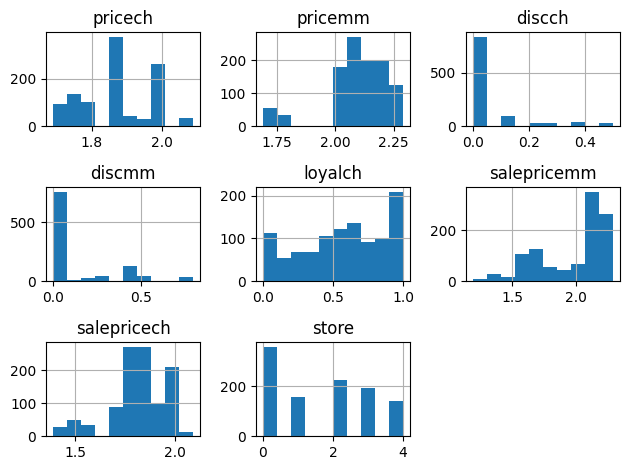

In [29]:
df.hist()
plt.tight_layout()
plt.show()

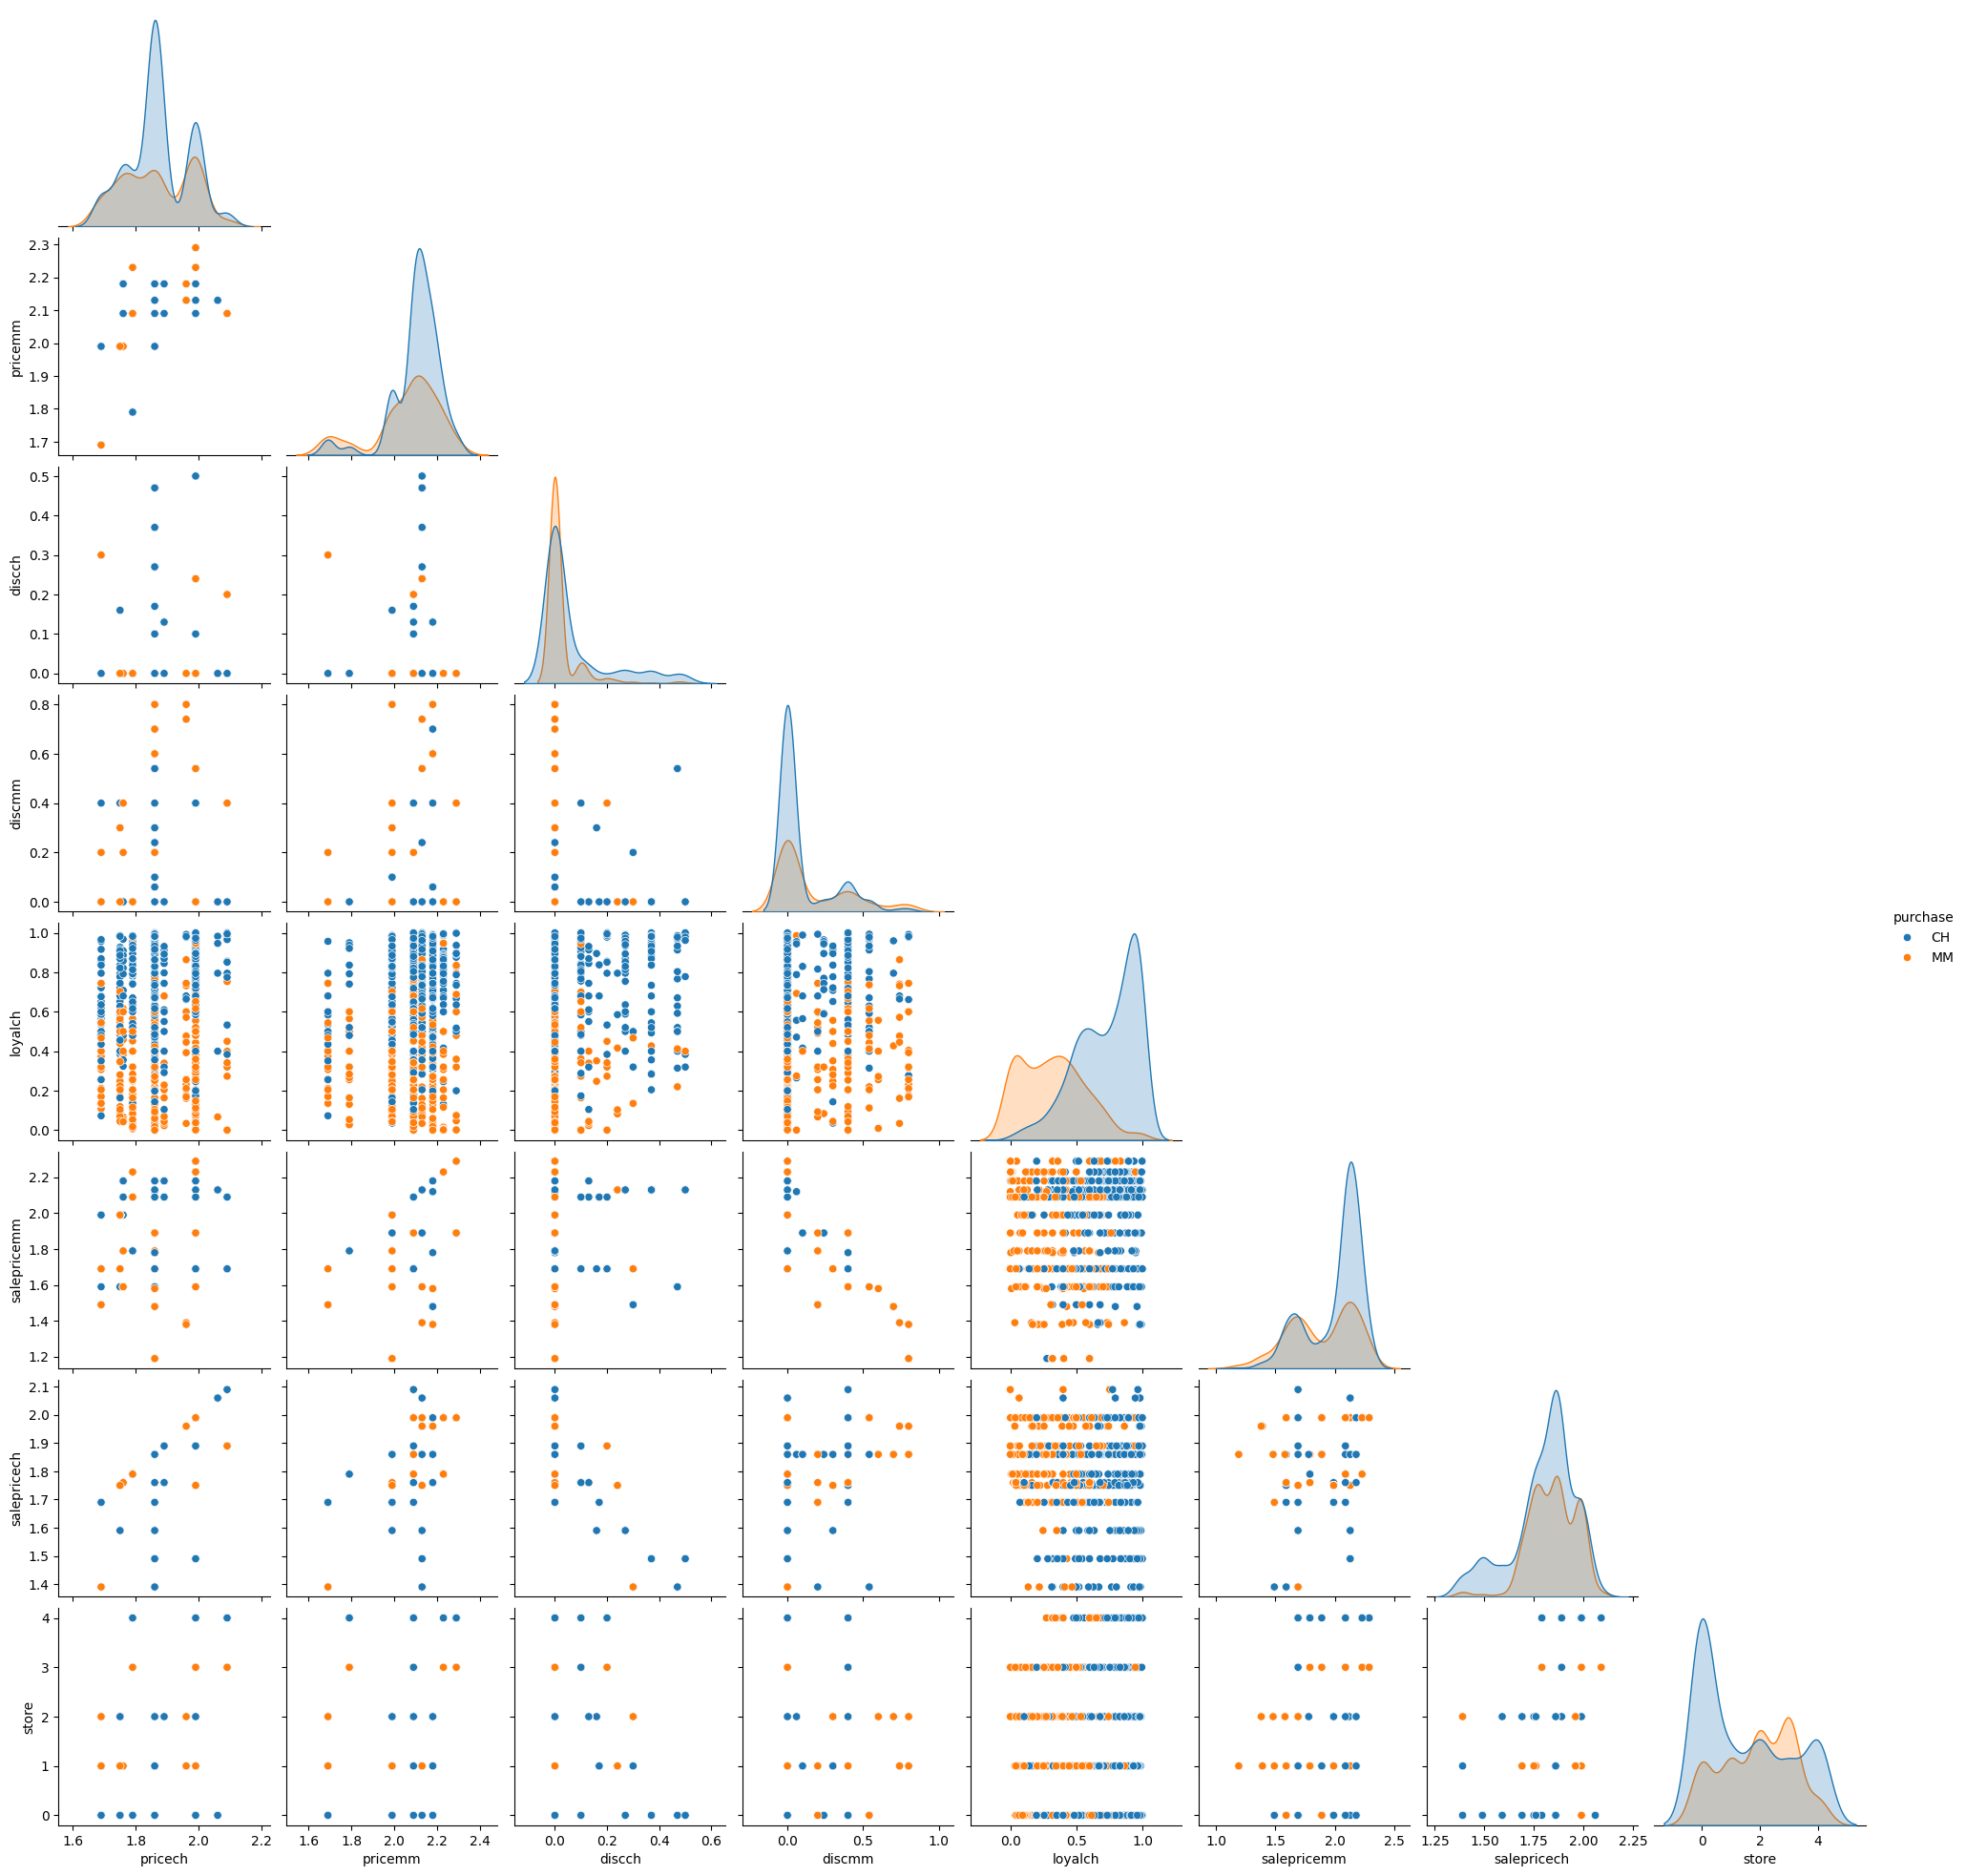

In [30]:
sns.pairplot(df_train,corner=True,hue="purchase")
plt.show()

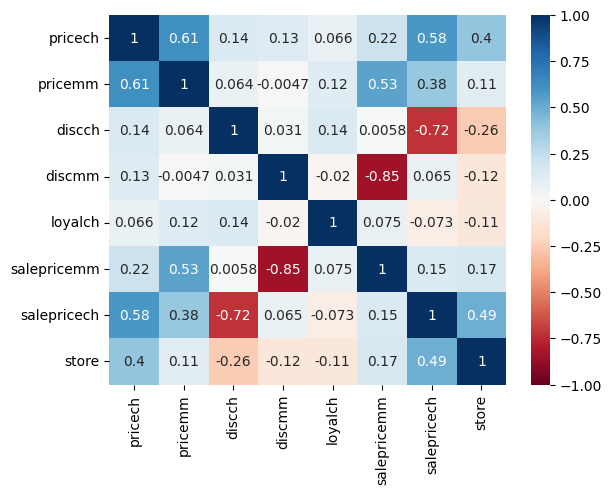

In [31]:
sns.heatmap(df_train.select_dtypes("number").corr(),vmin=-1,vmax=1,cmap="RdBu",annot=True)
plt.show()

In [32]:
# Deep learning
X_train = df_train.drop(columns='purchase')
X_test = df_test.drop(columns='purchase')

y_train = df_train['purchase']
y_test = df_test['purchase']

In [33]:
encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_test_enc = encoder.transform(y_test)

In [34]:
num_cols = X_train.select_dtypes('number').columns
cat_cols = X_train.select_dtypes('category').columns

num_proc = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer())

])

cat_proc = Pipeline(steps=[
    ('onehot', OneHotEncoder()),
    ('imputer', SimpleImputer())
])

processor = ColumnTransformer(transformers=[
    ('num_proc', num_proc, num_cols),
    ('cat_proc', cat_proc, cat_cols)
])

clf_ppl = Pipeline(steps=[
    ('proc', processor),
])

In [35]:
X_train_transform = clf_ppl.fit_transform(X_train)

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation="relu",input_shape=(X_train_transform.shape[1],)),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(16,activation="relu"),
    tf.keras.layers.Dense(8,activation="relu"),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/workspaces/clases-4geeks/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 64)             │         1,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,225 (16.50 KB)

 Trainable params: 4,225 (16.50 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
X_train_transform

array([[-0.10353738,  0.32139054, -0.45472388, ...,  0.        ,
         0.        ,  1.        ],
       [-0.10353738,  0.32139054,  1.82037383, ...,  0.        ,
         0.        ,  1.        ],
       [-0.10353738,  0.69448   , -0.45472388, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.17657159,  0.02291898,  0.3879049 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.10353738,  0.69448   , -0.45472388, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.17657159,  1.5152768 , -0.45472388, ...,  0.        ,
         1.        ,  0.        ]], shape=(856, 22))

In [40]:
history = model.fit(X_train_transform, y_train_enc, epochs=100, batch_size=32, validation_split=0.15)

Epoch 1/100


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7139 - loss: 0.6350 - val_accuracy: 0.7519 - val_loss: 0.5711
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7992 - loss: 0.5043 - val_accuracy: 0.7907 - val_loss: 0.4603
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8294 - loss: 0.4148 - val_accuracy: 0.8062 - val_loss: 0.4030
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8501 - loss: 0.3720 - val_accuracy: 0.8372 - val_loss: 0.3901
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8459 - loss: 0.3572 - val_accuracy: 0.8140 - val_loss: 0.3915
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8542 - loss: 0.3513 - val_accuracy: 0.8217 - val_loss: 0.3897
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8542 - loss: 0.3453 - val_accuracy: 0.8140 - val_loss: 0.3963
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8597 - loss: 0.3395 - val_accuracy: 0.8295 - val_loss: 0.3

In [41]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['accuracy']

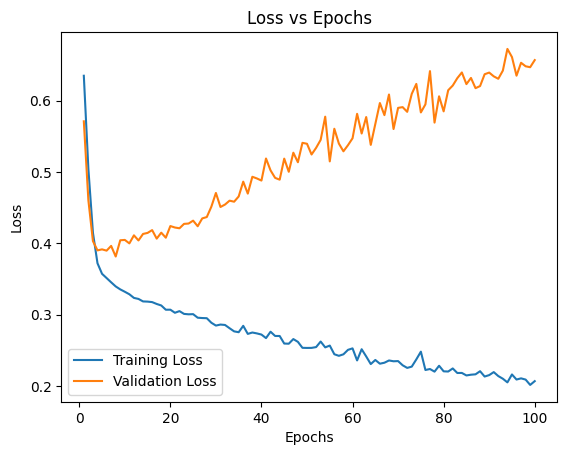

In [42]:
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,label="Training Loss")
plt.plot(epochs,val_loss,label="Validation Loss")
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

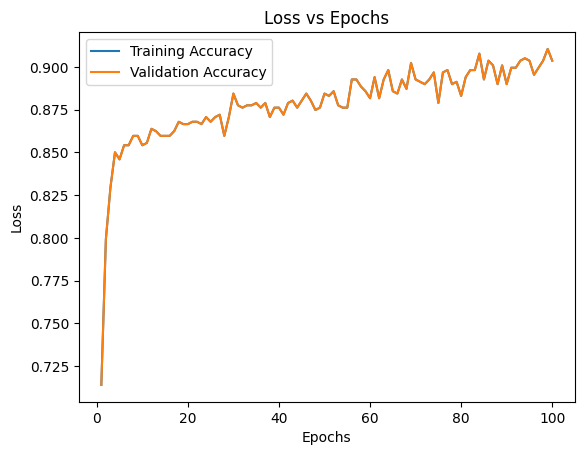

In [43]:
epochs = range(1,len(loss)+1)
plt.plot(epochs,accuracy,label="Training Accuracy")
plt.plot(epochs,val_accuracy,label="Validation Accuracy")
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()